# **Foundations of Data Science Fall 2023 - Homework 1 (32 points)**

### Student Name: Tekuri Sai Akhil
### Student Net Id: st5050

---



### **Part 0: Data Exploration and Linear Regression (5 Points)**

---


Background: This problem focuses on an ECG dataset that contains voltage measurements from a number of points on the scalp. A common task is to estimate which parts of the brain caused the measured response, which can help identify which parts of the brain are involved in specific tasks. However, the number of possible locations in the brain is much larger than the number of measurements, which makes this an appropriate task to assess the use of regularization to determine the brain region that is active under stimulus.


In [1]:
# Importing all important packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Downloading data

fn_src ='https://drive.google.com/uc?export=download&id=1RzQpKONOcXSMxH2ZzOI4iVMiTgD6ttSl'
fn_dst ='eeg_dat.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:
    print('Fetching file %s [53MB].  This may take a minute..' % fn_dst)
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File eeg_dat.p is already downloaded


In [3]:
# Loading data

import pickle
fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X,Y] = pickle.load(fp)

>>**1**\. **(1 Point)** *Display the first 5 rows of X and Y and print the dimensions for both datasets*



In [4]:
# Write your code here
#printing the dimensions
print("dimensions of X = "+ str(X.shape))
print("dimensions of Y = "+ str(Y.shape))

#printing the first 5 rows of X and Y
print("\nFirst 5 rows of X:")
print(X[0:5,:])
print("\nFirst 5 rows of Y:")
print(Y[0:5,:])

dimensions of X = (305, 22494)
dimensions of Y = (305, 85)

First 5 rows of X:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00529827  0.00491268  0.00598048 ...  0.00162549 -0.0023215
   0.00115952]
 [-0.01522969  0.00059051 -0.00191475 ...  0.00331738 -0.00214887
   0.00160143]]

First 5 rows of Y:
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.     


Note that there are three key variables:
* `nt`    = number of time steps that we measure data
* `nchan` = number of channels (i.e. electrodes) measured in each time step
* `ncur`  = number of currents in the brain that we want to estimate.  

Each current comes from one brain region (called a *voxel*) in either the `x`, `y` or `z` direction.  So,

    nvoxels = ncur / 3
    
The components of the `X` and `Y` matrices are:
*  `Y[i,k]` = electric field measurement on channel `i` at time `k`
*  `X[i,j]` = sensitivity of channel `i` to current `j`.



>>**2**\. **(1 Point)** Split the data into training and testing. What split do you use, and why?

>> 1) I did a random split of the data into test and train using train_test_split from sklearn
>> 2) train_test_split first shuffles the data and then splits the data according to the given test_size
>> 3) I did random split to avoid any sampling bias (In this case, the probalibity of an instance to be in the train data is same for all the instances)
>> 4) I've split the complete data as 80% train data and 20% test data. Because the best results are obtained by this split

In [5]:
# Write your code here

#Splitting the complete data as 80% train and 20% test data, using the randon_state=42
[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y, test_size=0.2, random_state=42)

#Printing the shapes of train and test data
print("Shape of X_train = " + str(X_train.shape))
print("Shape of Y_train = " + str(Y_train.shape))
print("Shape of X_test = " + str(X_test.shape))
print("Shape of Y_test = " + str(Y_test.shape))

Shape of X_train = (244, 22494)
Shape of Y_train = (244, 85)
Shape of X_test = (61, 22494)
Shape of Y_test = (61, 85)


>>**3**\. **(3 Points)** Perform linear regression. As a reminder, the optimization for linear regression using ordinary least squares is written below, the data consists of $n$ observations {$x_i$,$y_i$}. Each observation $i$ includes a scalar response $y_i$ and a column vector $x_i$ of $p$ variables (regressors).

>>The evaluation metric used for linear regression is the $R^2$ score. Explain what $R^2$ tells us, and interpret your results based on this.*



\begin{align}
\text{Ordinary Least Squares}
\end{align}



 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - β_o - \sum_{j=1}^p β_jx_{ij}  \right)^2  \right]
    \end{align}



In [6]:
# Write your code here

#Ordinary least squares training
ols_reg = LinearRegression().fit(X_train, Y_train)

#Extracting weights
W = ols_reg.coef_
W0 = ols_reg.intercept_

#Calculating R^2 score for train and test
train_score = r2_score(Y_train, X_train.dot(W.T) + W0)
test_score = r2_score(Y_test, X_test.dot(W.T) + W0)
print("train R^2 score = " +str(train_score))
print("test R^2 score = " +str(test_score))

train R^2 score = 1.0
test R^2 score = -6.374686363542263


>> 1) Evaluation metrics R2 is a measure that provides information about the goodness of fit of a model. It shows how well a regression model predicts the outcome of observed data.
>> 2) Here we got the R^2 score for train to be 1.0. This means the model does a very good job fitting the train data. In fact the model accurately predicts the train data.
>> 3) But we got the R^2 score of test to be -6.37 which is a negetive vale. This means the model does a very poor job on predicting test data.
>> 4) This is a case of overfitting. The model is too closely aligned to the train data that it fails to predict the test data. We can use regularization methods to reduce/remove this over fitting.

### **Part 1: Ridge Regularization (10 Points)**

---


>>**1**\. **(1 Point)** *Now we will use ridge regression, a model tuning method that can be used on data that suffers from multicollinearity. Notice the regularization term added to the optimization below, which uses the squared value of $β$. It is also known as L2 regularization. Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. First, what is the degree of collinearity in the data? Show your work and give rationale for the degree of collinearity.*


\begin{align}
\text{Ridge Regression}
\end{align}


 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - βo - \sum_{j=1}^p β_jx_{ij}  \right)^2 + λ\sum_{j=1}^p|β_j|^2  \right]
    \end{align}


In [7]:
# Write your code here

#Builing correlation coefficent matrix of X
correlation_metrics = np.corrcoef(X.T)
shape = correlation_metrics.shape
n = shape[0]

#Applying thresholding of 0.8 on correlation coefficent 
count = (np.sum(np.where(correlation_metrics[np.abs(correlation_metrics)>=0.8],1.0,0.0)) - n)/2
total = ((n-1)*(n-2))/2

print("Number of pairs of features with correlation coefficent>=0.8 is "+str(count))
print("Total number of pairs of features is "+str(total))

Number of pairs of features with correlation coefficent>=0.8 is 1418684.0
Total number of pairs of features is 252956278.0


>> 1) As you can see, amoung 252956278 pairs of features, 1418684 pairs of have correlation coefficient greater than or equal to 0.8. which is approximately 0.5% of pairs of features.
>> 2) Still 1418684 pairs is not a small number and their correlation coefficent is greater than or equal to 0.8
>> 3) We can say that the features of the data are highly collinear and we can reduce the feature space by feature selection based on collinearity.
>> 4) This might be the reason for over-fitting during the Ordinary Least Squares linear regression.

>>**1b**\. **(2 Points)** *Now implement ridge regression using sklearn. Start with the default alpha value, and print the $R^2$ score*

In [8]:
# Write your code here

#Ridge regression training with alpha = 1.0
rigid_reg = Ridge().fit(X_train, Y_train)

#Extracting weights
W = rigid_reg.coef_
W0 = ols_reg.intercept_

#Calculating R^2 scores for train and test data
train_score = r2_score(Y_train, X_train.dot(W.T) + W0)
test_score = r2_score(Y_test, X_test.dot(W.T) + W0)
print("train R^2 score = " +str(train_score))
print("test R^2 score = " +str(test_score))

train R^2 score = 0.5829184481040963
test R^2 score = 0.2093900999805397


>>**2**\. **(5 Points)** *Now we will look at what happens when varying the parameter. Try 10 different values for alpha and print the alpha value with corresponding $R^2$ score using Cross-Validation for training data. Describe how you pick the range of alpha values to examine.*



>> 1) I've picked the range of alpha values from 10^-4 to 10^5 with increasing alpha 10 times in each step.
>> 2) So, 10 values of alpha are [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
>> 3) Very small alpha values leads to under-regularization and very high alpha values leads to over-regularization.
>> 3) I've picked this range of alpha values (i.e from very small to very large alpha value) because I want to to see the transision of R^2 score from under-regularization to over-regularization to determine the best possible value of alpha that optimizes the model.

In [9]:
# Write your code here

#Running cross validation on train data with 5-fold cross validation on different alpha values 
for alpha in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]:
    ridge_reg = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_reg, X_train, Y_train, scoring='r2')
    mean_score = np.mean(scores)
    print("For alpha = "+str(alpha))
    print("    train R^2 score using Cross-Validation for training data = " +str(mean_score))

For alpha = 0.0001
    train R^2 score using Cross-Validation for training data = -3.9897580259257728
For alpha = 0.001
    train R^2 score using Cross-Validation for training data = -1.749784383862859
For alpha = 0.01
    train R^2 score using Cross-Validation for training data = -0.5184198687401002
For alpha = 0.1
    train R^2 score using Cross-Validation for training data = 0.015638027646995133
For alpha = 1
    train R^2 score using Cross-Validation for training data = 0.1095294609273321
For alpha = 10
    train R^2 score using Cross-Validation for training data = 0.018543955098075215
For alpha = 100
    train R^2 score using Cross-Validation for training data = -0.02906868091021376
For alpha = 1000
    train R^2 score using Cross-Validation for training data = -0.03755102509753059
For alpha = 10000
    train R^2 score using Cross-Validation for training data = -0.03848210959697833
For alpha = 100000
    train R^2 score using Cross-Validation for training data = -0.038576156502833

>>**3**\. **(2 Points)** What is the highest $R^2$ you can achieve?

In [10]:
# Write your code here
print("1) From above analysis we can see that the max R^2 is achieved between 0.1 and 10")
print("2) Now let's use this range to get the highest R^2 on test data \n")

#Getting the R^2 test score on the alpha values which has max R^2 score using cross-valiadation on training data
for alpha in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,4,6,8,10]:
    rigid_reg = Ridge(alpha=alpha).fit(X_train, Y_train)
    W = rigid_reg.coef_
    W0 = ols_reg.intercept_
    test_score = r2_score(Y_test, X_test.dot(W.T) + W0)
    print("For alpha = "+str(alpha))
    print("     test R^2 score = " +str(test_score))

print("\nfor alpha = 0.3, I'm getting the highest test R^2 score and that is equal to 0.26297227700137454")

1) From above analysis we can see that the max R^2 is achieved between 0.1 and 10
2) Now let's use this range to get the highest R^2 on test data 

For alpha = 0.1
     test R^2 score = 0.22444128672540126
For alpha = 0.2
     test R^2 score = 0.25844787694720167
For alpha = 0.3
     test R^2 score = 0.26297227700137454
For alpha = 0.4
     test R^2 score = 0.25874491933126353
For alpha = 0.5
     test R^2 score = 0.25136176548968253
For alpha = 0.6
     test R^2 score = 0.24287299954536362
For alpha = 0.7
     test R^2 score = 0.2341405632603746
For alpha = 0.8
     test R^2 score = 0.2255503685990379
For alpha = 0.9
     test R^2 score = 0.21727606912719052
For alpha = 1.0
     test R^2 score = 0.2093900999805397
For alpha = 2
     test R^2 score = 0.1505491215348417
For alpha = 4
     test R^2 score = 0.09178287490438426
For alpha = 6
     test R^2 score = 0.0629851614350941
For alpha = 8
     test R^2 score = 0.046137353669891655
For alpha = 10
     test R^2 score = 0.0352164420593

### **Part 2: Lasso Regularization (12 Points)**

---


>>**1**\. **(3 Points)** *Another method often used to improve performance is Lasso regularization. Lasso regression improves performance by using shrinkage, where data values are shrunk towards a central point, like the mean. Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in sparse models with few coefficients (many coefficients can -> 0 and are eliminated from the model). Implement this using sklearn with default parameter values and print the $R^2$ score*

 \begin{align}
\text{LASSO Regression}
\end{align}



 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - βo - \sum_{j=1}^p β_jx_ij  \right)^2 + λ\sum_{j=1}^p|β_j|  \right]
    \end{align}

In [11]:
# Write your code here

#Lasso regression training with alpha = 1.0
lasso_reg = Lasso().fit(X_train, Y_train)

#Extracting weights
W = lasso_reg.coef_
W0 = lasso_reg.intercept_

#Calculating R^2 score on train and test data
train_score = r2_score(Y_train, X_train.dot(W.T) + W0)
test_score = r2_score(Y_test, X_test.dot(W.T) + W0)
print("train R^2 score = " +str(train_score))
print("test R^2 score = " +str(test_score))

train R^2 score = -7.836868409118752e-18
test R^2 score = -0.011031130254368068


>>**2**\. **(5 Points)** *Try 10 different values for the regularization parameter Alpha and print the alpha value with corresponding $R^2$ score using cross-validation. Again, give your reasoning for the choices of alpha. If you choose to tune any other hyperparameters of the model then justify your reason for it*


>> 1) I've picked the range of alpha values from 10^-5 to 1.
>> 2) So, 10 values of alpha are [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1]
>> 3) Very small alpha values leads to under-regularization and very high alpha values leads to over-regularization.
>> 4) I've picked this range of alpha values (i.e from very small to very large alpha value) because I want to to see the transision of R^2 score from under-regularization to over-regularization to determine the best possible value of alpha that optimizes the model.
>> 5) I've also set the tol (The tolerance for the optimization) value to 0.01. 
>> 6) Because by using the default value of tol(=0.0001) the model is taking very high number of iteration and very long time to converge. Since we are doing the cross-validation the results of the experiment do not vary much if we use slightly higher tol(=0.01). So i've used a slightly higher tolerance(=0.01). 

In [12]:
# Write your code here
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1]

#Running cross validation on train data with 5-fold cross validation on different alpha values with tol=0.01
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, tol = 0.01)
    scores = cross_val_score(lasso_reg, X_train, Y_train, scoring='r2')
    mean_score = np.mean(scores)
    print("For alpha = "+str(alpha))
    print("    train R^2 score using Cross-Validation for training data = " +str(mean_score))

For alpha = 1e-05
    train R^2 score using Cross-Validation for training data = -0.6874988219381628
For alpha = 5e-05
    train R^2 score using Cross-Validation for training data = 0.06308092908704029
For alpha = 0.0001
    train R^2 score using Cross-Validation for training data = 0.19524984288057362
For alpha = 0.0005
    train R^2 score using Cross-Validation for training data = 0.23078291196889117
For alpha = 0.001
    train R^2 score using Cross-Validation for training data = 0.12419850698495918
For alpha = 0.005
    train R^2 score using Cross-Validation for training data = -0.03858661683300629
For alpha = 0.01
    train R^2 score using Cross-Validation for training data = -0.03858661683300629
For alpha = 0.05
    train R^2 score using Cross-Validation for training data = -0.03858661683300629
For alpha = 0.1
    train R^2 score using Cross-Validation for training data = -0.03858661683300629
For alpha = 1
    train R^2 score using Cross-Validation for training data = -0.038586616

>>**3**\. **(2 Point)** *Plot a graph for different Alpha values and corresponding R^2 score. Explain the shape of the curve.*

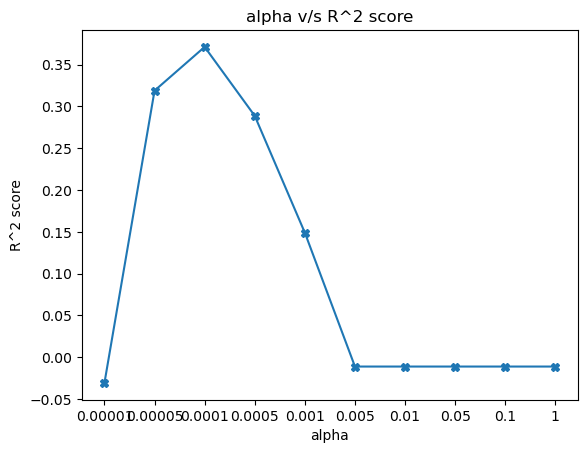

In [13]:
# Write your ocde here
alphas = ['0.00001', '0.00005', '0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '1']
lasso_scores = []

#Getting the R^2 test score on different alpha values
for alpha in  [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1]:
    lasso_reg = Lasso(alpha=alpha, tol = 0.01).fit(X_train, Y_train)
    W = lasso_reg.coef_
    W0 = lasso_reg.intercept_
    test_score = r2_score(Y_test, X_test.dot(W.T) + W0)
    lasso_scores.append(test_score)
                          
plt.plot(alphas, lasso_scores, marker='X')
plt.title("alpha v/s R^2 score")
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.show()

>> 1) When the value of alpha(= 0.00001) is very low the value of R^2 is negative. This is because of under-regularization. The loss function the log loss term(RSS) dominates the regularization term and the model overfit the traing data resulting in low value of R^2.
>> 2) as alpha increases the value of R^2 increases. Here we see the effect of regularization, balance between RSS and regularization term.
>> 3) If the alpha value still increases the R^2 value decreases and eventually it becomes negetive again. This is because of over-regularization. In the loss function the regularization term dominates the log loss term(RSS) and the model fails to learn the underlying function resulting in low value of R^2.

>>**4**\. **(2 Point)** *Which of the following two methods of Regularization worked better and why?*


>> 1) L1 regularization seems to be working better than L2 regularization in this case.
>> 2) Because the highest R^2 score for Lasso regression(L1 regularizarion) is more them 0.35(from the graph) and highest R^2 score for Ridge regression(L2 regularizationO is 0.26 which is less than that of lasso.
>> 3) This can be explained from the collinearity of the feature. Since we found that many pairs of features are collinear in the beginning, the model which gives sparse weights will give high accuracy. So, L1 regularization (Lasso regression) which gives sparse outputs tries to make the weights of one of the feature in these pair as zero and gives us best results in this case(high collinear) when compared to L2 regularization (Ridge regression).

### **Part 3: Logistic Regression (5 Points)**

---


**1. (1 point)** Now let's consider logistic regression. What is the difference betweeen a linear and logistic regression problem? Explain. (You may take the example of the dataset and task used in this assignment to explain how it would look different for a logistic regression problem)

>> 1) In linear regression the target variable Y is continuous and In logistic regression the target variable Y is binary.
>> 2) Linear Regression is used to for regression tasks and logistic regression is generally used for classifications tasks.
>> 3) In this data set Y has a shape of (305, 85). Each target varariable is a 85x1 vector and is continuous
>> 4) We can conver this linear regression problem to a logistic regression if we classify Y as follows. if sum of all 85 values of the target variable is >=0 we classify them as class 1. if sum of all 85 values of the target variable is <0 we classify them as class 0.
>> 7) Now we can use this transformed data to perform logistic regression
>> 8) This transformation makes sense because each target variable is a 85x1 vector, which is the measurement over time periodically. So taking the sum of all 85 measurement >=0 as class 1 and sum of all 85 measurement <0 as class 0 is justified.

**2. (1 point )** Following your answer in the previous question, convert the dataset such that for the same outcome prediction task, a logistic regression is suitable.

In [14]:
# place your code here

#X data is not modified
X_log = X

# Y data is modifies as discussed above
Y_log = np.sum(Y,axis = 1)
Y_log = np.where(Y_log>=0.0,1.0,0.0)

**3. (1 point)** Split this new dataset into training and testing with a 2:1 split. Implement logistic regression.

In [15]:
# Place your code here

#Split the complete data into training and testing with a 2:1 split
[X_log_train, X_log_test, Y_log_train, Y_log_test] = train_test_split(X_log, Y_log, test_size=0.333, random_state=42)

#Logistic regression training
log_reg = LogisticRegression().fit(X_log_train, Y_log_train)

#Calculating train score
train_score = log_reg.score(X_log_train,Y_log_train)
print("Train accuracy = "+ str(train_score))

Train accuracy = 0.7881773399014779


**4. (2 point)** Report the performance of the model on the test data using accuracy. Also plot the confusion matrix and ROC-AUC curve. What can you infer from this confusion matrix? Also can you compare the logistic and linear regressions?

Test accuracy = 0.5784313725490197
Confusion matrix  :
[[22 26]
 [17 37]]


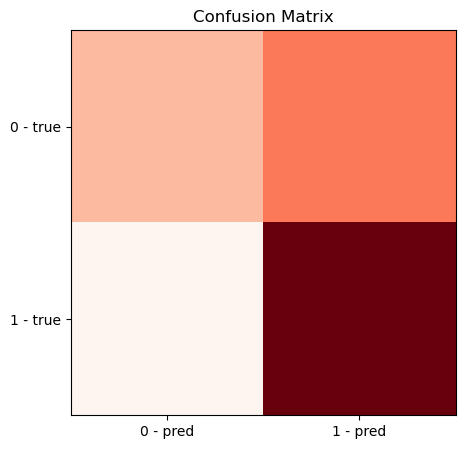

Area under curve of ROC = 0.5717592592592593


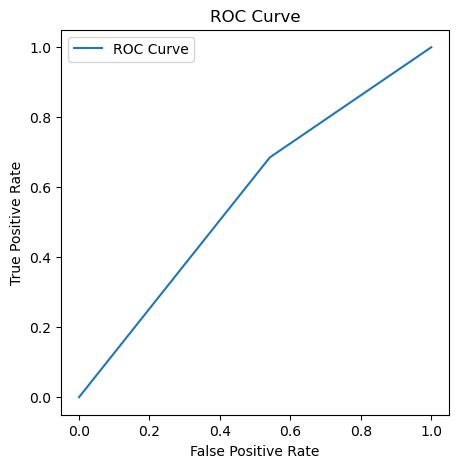

In [18]:
# Place your code here

#Calculating train score
test_score = log_reg.score(X_log_test,Y_log_test)
print("Test accuracy = "+ str(test_score))

#Calculating confusion metrics
confusion_metrics = confusion_matrix(Y_log_test, log_reg.predict(X_log_test))
print("Confusion matrix  :\n" + str(confusion_metrics))

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(confusion_metrics, cmap='Reds')
plt.xticks(range(2), ['0 - pred', '1 - pred'])
plt.yticks(range(2), ['0 - true', '1 - true'])
plt.title('Confusion Matrix')
plt.show()

#Calculate the AUC ROC curve
auc_roc = roc_auc_score(Y_log_test, log_reg.predict(X_log_test))
print("Area under curve of ROC = " + str(auc_roc))

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(roc_curve(Y_log_test, log_reg.predict(X_log_test))[0], roc_curve(Y_log_test, log_reg.predict(X_log_test))[1], label='ROC Curve')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

>> 1) TP = 37, TN = 22, FP = 26, FN = 17
>> 2) Accuracy = TP+TN/ TP+TN+FP+FN = 59/102 = 0.57
>> 3) Precision = TP/TP+FP = 37/63 = 0.58
>> 4) Recall = TP/TP+FN = 37/54 = 0.68
>> 5) F1-score = 2*Precision*Recall/(Precision+Recall) = 0.78/1.26 = 0.61
>> 6) F1-score is used to evaluate the overall performance of a classification model. We have the F1 score of this model as 0.61. Which is not very good model.

>> 1) It is not possible to compare logistic and linear regressions because the R2 score calculated in linear regression is very different from the F1-score we calculated in logistic regression. So it is not feasible to comapare logistic and linear regressions 


In [19]:
##End of HW1